In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


"Import libaries Function"

In [2]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import keras
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

In [3]:
filepath = "/content/drive/MyDrive/Novel_Sourcecode/Dataset-Unicauca-Version2-87Atts.csv"
df = pd.read_csv(filepath)

In [4]:
df.head(4)

,Flow.ID,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Timestamp,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,...,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,Label,L7Protocol,ProtocolName
0,172.19.1.46-10.200.7.7-52422-3128-6,172.19.1.46,52422,10.200.7.7,3128,6,26/04/201711:11:17,45523,22,55,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY
1,172.19.1.46-10.200.7.7-52422-3128-6,10.200.7.7,3128,172.19.1.46,52422,6,26/04/201711:11:17,1,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY
2,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,1,3,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP
3,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,217,1,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP
4,192.168.72.43-10.200.7.7-55961-3128-6,192.168.72.43,55961,10.200.7.7,3128,6,26/04/201711:11:17,78068,5,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY


In [5]:
df=df.iloc[:1000]
df.shape 
#df.columns

(1000, 87)

In [6]:
feats_importance = ['Destination.IP', 'Destination.Port', 'Source.IP', 'Init_Win_bytes_forward',
 'min_seg_size_forward', 'Fwd.Packet.Length.Max', 'Init_Win_bytes_backward', 'Flow.IAT.Max',
 'Source.Port', 'Flow.Duration', 'Fwd.Packet.Length.Std', 'Bwd.IAT.Total',
 'Avg.Fwd.Segment.Size', 'Fwd.Packets.s', 'Fwd.IAT.Total', 'Fwd.IAT.Max',
 'Fwd.Packet.Length.Mean', 'Subflow.Fwd.Bytes', 'Flow.Bytes.s', 'Min.Packet.Length',
 'Total.Length.of.Fwd.Packets', 'Bwd.IAT.Max', 'Packet.Length.Variance', 'Bwd.Packets.s',
 'Flow.IAT.Mean', 'Fwd.Header.Length', 'act_data_pkt_fwd', 'Max.Packet.Length',
 'Flow.Packets.s', 'Flow.IAT.Std', 'Packet.Length.Std', 'Idle.Max',
 'Fwd.Header.Length.1', 'Bwd.Packet.Length.Mean', 'Bwd.IAT.Std', 'Fwd.Packet.Length.Min',
 'Bwd.Packet.Length.Std', 'Avg.Bwd.Segment.Size', 'Average.Packet.Size', 'Total.Length.of.Bwd.Packets',
 'Packet.Length.Mean', 'Fwd.IAT.Mean', 'Fwd.IAT.Std', 'Flow.IAT.Min',
 'Bwd.IAT.Mean', 'Bwd.Packet.Length.Max', 'Subflow.Fwd.Packets', 'Total.Fwd.Packets',
 'Total.Backward.Packets', 'Bwd.Header.Length', 'Subflow.Bwd.Bytes', 'Subflow.Bwd.Packets', 
 'Idle.Mean', 'Fwd.IAT.Min', 'Down.Up.Ratio', 'Idle.Min']

In [7]:
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()
df['Label'] = number.fit_transform(df['Label'].astype(str))
df['Flow.ID'] = number.fit_transform(df['Flow.ID'].astype(str))
df['Source.IP'] = number.fit_transform(df['Source.IP'].astype(str))
df['Destination.IP'] = number.fit_transform(df['Destination.IP'].astype(str))
df['Timestamp'] = number.fit_transform(df['Timestamp'].astype(str))
df['ProtocolName'] = number.fit_transform(df['ProtocolName'].astype(str))	

In [8]:
df.head(2)

,Flow.ID,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Timestamp,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,...,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,Label,L7Protocol,ProtocolName
0,102,18,52422,8,3128,6,0,45523,22,55,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,131,7
1,102,11,3128,24,52422,6,0,1,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,131,7


In [9]:
feats = [x for x in df.columns if x != 'ProtocolName']
X = df[feats].astype(float)
Y = df['ProtocolName']

In [10]:
print(X.shape )
print(Y.shape)

(1000, 86)
(1000,)


In [11]:
yd = np_utils.to_categorical(Y)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, yd, test_size = 0.3, random_state = 42)

In [32]:
print(X_train.shape )
print(y_train.shape)
print(X_test.shape )
print(y_test.shape)

(700, 86)
(700, 13)
(300, 86)
(300, 13)


In [34]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
import keras.backend as K
def get_f1(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [36]:
input_shape = X_train.shape[1:]
num_classes = y_train.shape[1]

In [37]:

X_train=np.expand_dims(X_train, axis=2)
y_train=np.expand_dims(y_train,axis=1)

In [38]:

from tensorflow.keras.layers import SimpleRNN
model = Sequential()
model.add(SimpleRNN(64, activation='relu', input_shape=(86,1)))
model.add(Dense(1, activation='relu'))


print('Training...')
model.compile(loss='mse', optimizer='adam',metrics=['accuracy'])
print (model.summary())
print ('\n')

Training...
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 64)                4224      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,289
Trainable params: 4,289
Non-trainable params: 0
_________________________________________________________________
None




In [39]:

history = model.fit(X_train,y_train, epochs=2, batch_size=5, verbose=10)
RNN=model.evaluate(X_train,y_train,verbose=1)[1]*100
print("LSTM  Accuracy",RNN,'%')

Epoch 1/2
Epoch 2/2
22/22 [==============================] - 0s 8ms/step - loss: 0.0769 - accuracy: 0.9231
LSTM  Accuracy 92.30767488479614 %


epochs ===20


In [40]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=2)

10/10 - 0s - loss: 0.0769 - accuracy: 0.9231 - 230ms/epoch - 23ms/step


In [41]:
y_pred=model.predict(X_test)


In [42]:
y_test[0].shape

(13,)

In [43]:
print("Accuracy:")
print(accuracy)

Accuracy:
0.9230769872665405


In [44]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix


In [46]:

print()
print("LSTM  Accuracy is:",accuracy*100,'%')
print()




LSTM  Accuracy is: 92.30769872665405 %



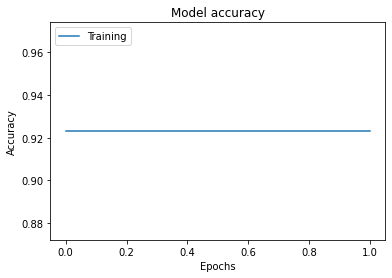

In [49]:
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Training'], loc='upper left')
plt.savefig("Accuracy_img.png")

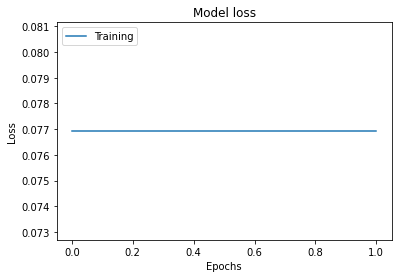

In [50]:
plt.plot(history.history['loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epochs') 
plt.legend(['Training'], loc='upper left') 
plt.savefig("Loss_img.png")

In [51]:
y_predd=y_test[:,1]

In [57]:
y_predd

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [56]:
inp=int(input('Enter the Intrusion detection  Attack '))
if (y_predd[inp] ==1 ):
    print("Attack  ")
else:
    print("non Attack ")

Enter the Intrusion detection  Attack 4
non Attack 
